## Installation de spark-cluster & findspark, pyspark 

In [ ]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.1.1-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

# install pyspark
!pip install pyspark

# importation et initialisation de Spark

In [ ]:
import findspark 
findspark.init()

## importer PySpark et initialiser SparkContext
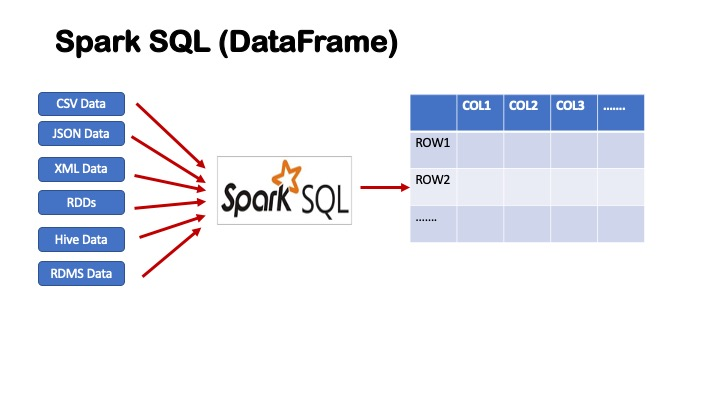

In [ ]:
from pyspark.sql import SparkSession
session =SparkSession.builder.master("local").appName("FirstApp").getOrCreate() 


### Lecture des données

In [ ]:
books_df = session.read.csv('books.csv', header=True, inferSchema=True) 

### Afficher des Informations sur le  schéma

In [ ]:
books_df.printSchema()

In [ ]:
type(books_df)

In [ ]:
len(books_df.columns)

### Le nombre d'éléments

In [ ]:
books_df.count()

### Le DataFrame rating_df

In [ ]:
ratings_df = session.read.csv('ratings.csv', header=True, inferSchema=True) 

In [ ]:
ratings_df.count()

In [ ]:
ratings_df.printSchema()

### La fonction show()  & head()

In [ ]:
ratings_df.show(5)

In [ ]:
ratings_df.head(5)

### Créer un dataFrame From RDD

In [ ]:
from pyspark.sql import Row

sc=session.sparkContext

# Chargement du fichier texte et conversion de chaque ligne en Row.
lines = sc.textFile("HousePrice.csv")
lines = lines.filter(lambda line: "city" not in line  or "price" not in line)
parts = lines.map(lambda l: l.split(","))
house = parts.map(lambda p: Row(ville=p[15], prix=float(p[1])))

# Déduire le schéma et enregistrer le DataFrame comme une table.
schemaHouse = session.createDataFrame(house)
schemaHouse.show(10)

### Afficher des statistiques sur les données 

In [ ]:
ratings_df.describe('rating').show()

### La projection sur un dataFrame avec select()

In [ ]:
ratings_df.select("book_id","rating").show(5)

### Filter les données d'un dataFrame

In [ ]:
ratings_df.filter("rating <= 3").show(5)

In [ ]:
ratings_df.filter("rating <= 3 and book_id<10").show(5)

In [ ]:
ratings_df.select("book_id","rating").filter("rating <= 3").show(5)

### Distinct()

In [ ]:
ratings_df.select("user_id").distinct().show(5)


### Le groupement d'un dataFrame

In [ ]:
ratings_df.groupby("rating").count().show()

In [ ]:
ratings_df.groupby('book_id').avg('rating').show(5)

### Ordonner le résultats

In [ ]:
ratings_df.orderBy("rating").show(5)

In [ ]:
ratings_df.orderBy(ratings_df.rating.desc()).show(5)

### Jointure entre les dataFrames

In [ ]:
ratings_df.join(books_df, books_df.book_id == ratings_df.book_id)\
          .select("user_id","title","rating").show(5)

### SQL natives avec createTempView()

In [ ]:
ratings_df.createTempView("rating_table")
session.sql("SELECT * FROM rating_table ORDER BY book_id DESC").show(5)

### Gestion des colonnes avec withColumn

In [ ]:
ratings_df.withColumn("rating", ratings_df.rating*10).show(5)

In [ ]:
new_dataset = ratings_df.withColumn("rating_ten", ratings_df.rating*10)
new_dataset.show(5)

### Supprimer une Colonne

In [ ]:
ratings_df.drop('rating').show(5)

In [ ]:
ratings_df.show(5)

### Gestion des doublants et les valeurs nulls

In [ ]:
ratings_df.count()

In [ ]:
ratings_df.dropDuplicates().count()

In [ ]:
ratings_df.dropna('any').count() # drop a row if it contains any nulls

In [ ]:
ratings_df.dropna('all').count() # drop a row if it contains any nulls

### Conversion

In [ ]:
ratings_df.toPandas()

In [ ]:
rdd_convert = ratings_df.rdd
rdd_convert.collect()